https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

/Users/tradergllc/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# x = Dense(encoding_dim * 10, activation='relu')(input_img)
x = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, x)

encoded_ip = Input(shape=(encoding_dim,))
# y = Dense(encoding_dim * 10, activation='relu')(encoded_ip)
y = Dense(784, activation='sigmoid')(encoded_ip)
decoder = Model(encoded_ip, y)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoder(encoder(input_img)))

In [3]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.3685 - val_loss: 0.2720
Epoch 2/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.2659 - val_loss: 0.2569
Epoch 3/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.2471 - val_loss: 0.2347
Epoch 4/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2258 - val_loss: 0.2151
Epoch 5/50
60000/60000 [==============================] - 4s 60us/step - loss: 0.2096 - val_loss: 0.2019
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.1986 - val_loss: 0.1928
Epoch 7/50
60000/60000 [==============================] - 3s 54us/step - loss: 0.1907 - val_loss: 0.1858
Epoch 8/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1842 - val_loss: 0.1797
Epoch 9/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.1786 - val_loss: 0.1744
Epoch

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

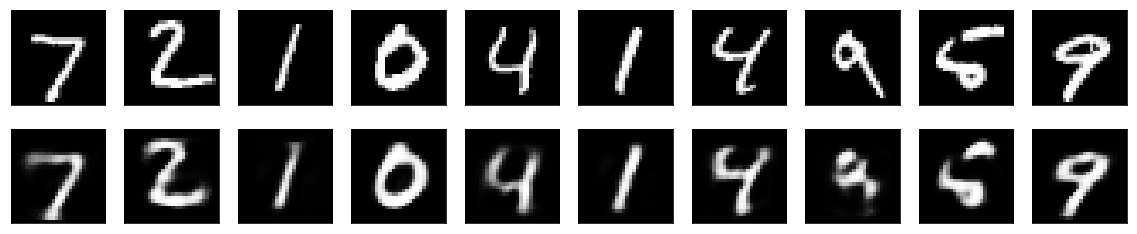

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()